In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Text(0.5, 1.0, 'NCR/NET mask')

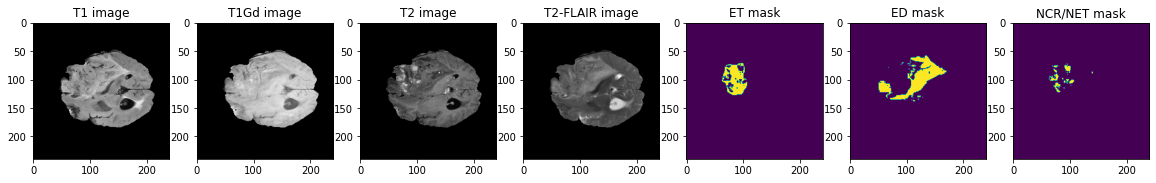

In [2]:
# imports to view data
import h5py
import matplotlib.pyplot as plt

INPUT_DIR = '/kaggle/input/brats2020-training-data/BraTS2020_training_data/content/data/'
OUTPUT_DIR = '/kaggle/working/'

f = h5py.File(INPUT_DIR + 'volume_293_slice_67.h5', 'r')

img = np.array(f['image'])
msk = np.array(f['mask'])

np.unique(msk[:,:,2])

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(20,10))
ax1.imshow(img[:,:,0], cmap='gray')
ax1.set_title('T1 image')
ax2.imshow(img[:,:,1], cmap='gray')
ax2.set_title('T1Gd image')
ax3.imshow(img[:,:,2], cmap='gray')
ax3.set_title('T2 image')
ax4.imshow(img[:,:,3], cmap='gray')
ax4.set_title('T2-FLAIR image')
ax5.imshow(msk[:,:,0])
ax5.set_title('ET mask')
ax6.imshow(msk[:,:,1])
ax6.set_title('ED mask')
ax7.imshow(msk[:,:,2])
ax7.set_title('NCR/NET mask')

In [3]:
import glob
import tensorflow as tf

# get images that contain tumours
metadata = pd.read_csv(INPUT_DIR + 'meta_data.csv')

filelist = metadata['slice_path'][metadata['target']==1]
filelist = filelist.str.split('/').str.get(-1)

filelist = filelist.to_numpy()

# filelist = filelist.to_numpy()
# filelist
# h5Counter = len(glob.glob1(INPUT_DIR,'*.h5'))
# h5list = np.empty(shape=h5Counter, dtype=object)

# for index, h5f in enumerate(glob.iglob(INPUT_DIR + '*.h5')):
#     h5list[index] = h5f.split('/')[-1]

In [4]:
from sklearn.model_selection import train_test_split
def split_data(files):
    # get subset of half the data because dataset is too large

    # split data into train, validation, and test sets
    train_ratio = 0.70
    validation_ratio = 0.20
    test_ratio = 0.10

    # train is now 70% of the entire data set
    train_list, temp_list = train_test_split(files, test_size=1 - train_ratio)

    # test is now 10% of the initial data set
    # validation is now 20% of the initial data set
    val_list, test_list = train_test_split(temp_list, test_size=test_ratio/(test_ratio + validation_ratio)) 
    
    return train_list, val_list, test_list

train_list, val_list, test_list = split_data(filelist)

In [5]:
def combine_h5s(file_list, output, **kwargs):
    if 'INPUT_DIR' in kwargs:
        INPUT_DIR = kwargs['INPUT_DIR']
    else: 
        INPUT_DIR = '/kaggle/input/brats2020-training-data/BraTS2020_training_data/content/data/'
    
    if 'OUTPUT_DIR' in kwargs:
        OUTPUT_DIR = kwargs['OUTPUT_DIR']
    else: 
        OUTPUT_DIR = '/kaggle/working/'
        
    if 'sizes' in kwargs:
        IMG_SIZE = kwargs['sizes'][0]
        IMG_CH = kwargs['size'][1]
        MSK_CH = kwargs['size'][2]
    else:
        IMG_SIZE = 128
        IMG_CH = 4
        MSK_CH = 3
    
    img_shape = (len(file_list), IMG_SIZE, IMG_SIZE, IMG_CH)
    msk_shape = (len(file_list), IMG_SIZE, IMG_SIZE, MSK_CH)
        
    with h5py.File(OUTPUT_DIR + output, 'a') as h5_out:
        images = h5_out.require_dataset('image', dtype='f4', shape=img_shape)
        masks = h5_out.require_dataset('mask', dtype='f4', shape=msk_shape)
        
        for index, file in enumerate(file_list):
            if index%100 == 0: print(index)
            with h5py.File(INPUT_DIR + file, 'r') as h5_in:
                # downsample to 128x128 to save space
                images[index,:,:,:] = tf.image.resize_with_pad(h5_in['image'],128,128)
                masks[index,:,:,:] = tf.image.resize_with_pad(h5_in['mask'],128,128)

In [6]:
# os.remove(OUTPUT_DIR + 'train.h5')
combine_h5s(train_list, 'train.h5')

0


2022-02-12 07:12:53.606213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 07:12:53.727629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 07:12:53.728715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 07:12:53.731878: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000


In [7]:
# os.remove(OUTPUT_DIR + 'val.h5')
combine_h5s(val_list, 'val.h5')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800


In [8]:
# os.remove(OUTPUT_DIR + 'test.h5')
combine_h5s(test_list, 'test.h5')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
